# Exercise 6

## Predict rating using LSTM


In [1]:
import pandas as pd

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [4]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [5]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [6]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

# Exercise 6.1

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

## Remove Stopwords and Lowercase

In [7]:
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Descargar las stopwords desde NLTK
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
df = dataTraining

In [9]:
# Cargar stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para limpiar texto
def clean_text(text):
    # Convertir texto a minúsculas y dividir en palabras
    words = text.lower().split()
    # Eliminar stopwords
    cleaned_words = [word for word in words if word not in stop_words]
    return " ".join(cleaned_words)

# Aplicar la función de limpieza a cada trama
cleaned_plots = [clean_text(plot) for plot in plots]


In [10]:
df.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


## Tokenizar Texto

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_plots)
sequences = tokenizer.texts_to_sequences(cleaned_plots)

##  Pad Sequences

In [12]:
# Ejemplo de longitud máxima, ajusta según necesites
max_length = max(len(sequence) for sequence in sequences)

# Aplicar padding
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')


# Exercise 6.2

Create a SimpleRNN neural network to predict the rating of a movie

Calculate the testing set accuracy

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convertir las calificaciones a numpy array
ratings = df['rating'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, ratings, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Dimensiones del embedding
embedding_dim = 100

In [19]:

# 
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=max_length))
model.add(SimpleRNN(124)) # Puedes ajustar el número de neuronas
model.add(Dense(1, activation='linear')) # 'linear' porque es una tarea de regresión

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 850, 100)          3856000   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 124)               27900     
                                                                 
 dense_1 (Dense)             (None, 1)                 125       
                                                                 
Total params: 3884025 (14.82 MB)
Trainable params: 3884025 (14.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)


Epoch 1/10
158/158 [==============================] - 131s 820ms/step - loss: 2.3366 - mae: 1.0656 - val_loss: 1.1080 - val_mae: 0.8162
Epoch 2/10
158/158 [==============================] - 127s 798ms/step - loss: 1.1931 - mae: 0.8506 - val_loss: 1.1033 - val_mae: 0.8400
Epoch 3/10
158/158 [==============================] - 123s 782ms/step - loss: 1.1936 - mae: 0.8505 - val_loss: 1.0887 - val_mae: 0.8270
Epoch 4/10
158/158 [==============================] - 123s 778ms/step - loss: 1.1969 - mae: 0.8530 - val_loss: 1.0893 - val_mae: 0.8167
Epoch 5/10
158/158 [==============================] - 122s 775ms/step - loss: 1.1937 - mae: 0.8504 - val_loss: 1.0923 - val_mae: 0.8315
Epoch 6/10
158/158 [==============================] - 120s 760ms/step - loss: 1.1966 - mae: 0.8532 - val_loss: 1.0940 - val_mae: 0.8163
Epoch 7/10
158/158 [==============================] - 120s 762ms/step - loss: 1.2063 - mae: 0.8552 - val_loss: 1.0881 - val_mae: 0.8260
Epoch 8/10
158/158 [============================

In [21]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}\nTest MAE: {test_mae}')

50/50 [==============================] - 3s 63ms/step - loss: 1.1738 - mae: 0.8617
Test Loss: 1.1737626791000366
Test MAE: 0.8617128729820251


In [17]:
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

# Calcula las predicciones
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calcula MSE y MAE para el conjunto de entrenamiento
mse = MeanSquaredError()
mse.update_state(y_train, train_predictions)
train_mse = mse.result().numpy()

mae = MeanAbsoluteError()
mae.update_state(y_train, train_predictions)
train_mae = mae.result().numpy()

# Calcula MSE y MAE para el conjunto de prueba
mse.reset_state() # Reinicia el estado del objeto MSE
mse.update_state(y_test, test_predictions)
test_mse = mse.result().numpy()

mae.reset_state() # Reinicia el estado del objeto MAE
mae.update_state(y_test, test_predictions)
test_mae = mae.result().numpy()

print(f'Train MSE: {train_mse}, Train MAE: {train_mae}')
print(f'Test MSE: {test_mse}, Test MAE: {test_mae}')


50/50 [==============================] - 3s 63ms/step
Train MSE: 1.1773267984390259, Train MAE: 0.8365687131881714
Test MSE: 1.2766900062561035, Test MAE: 0.8419028520584106


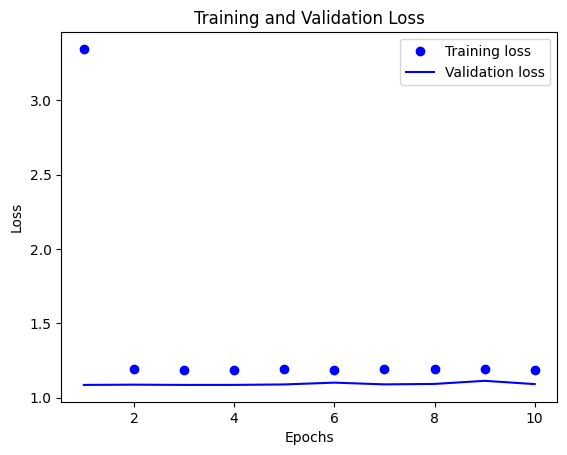

In [18]:
import matplotlib.pyplot as plt

# Obtén los valores de pérdida de entrenamiento y validación
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# Gráfico de la pérdida de entrenamiento y validación
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


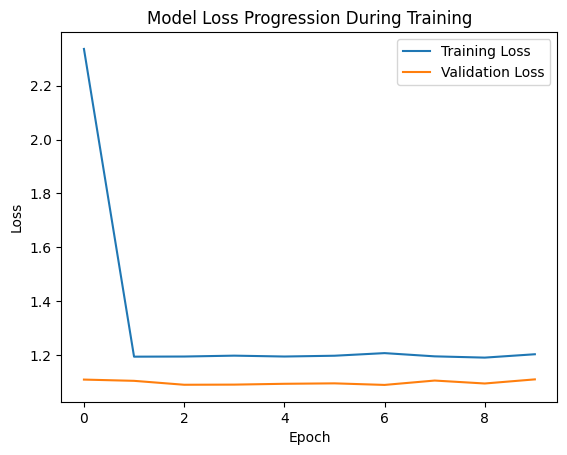

In [95]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


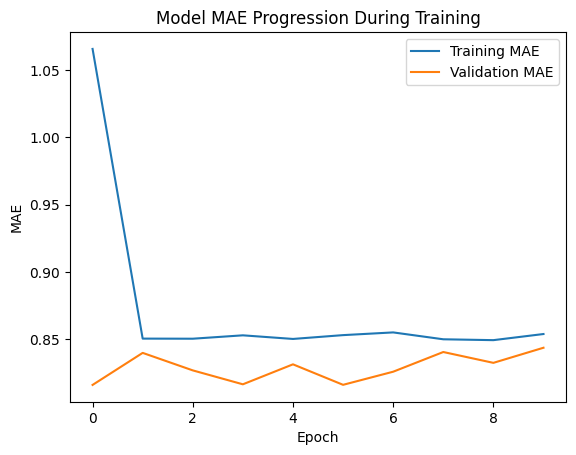

In [96]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Progression During Training')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training MAE', 'Validation MAE'])
plt.show()


50/50 [==============================] - 3s 60ms/step


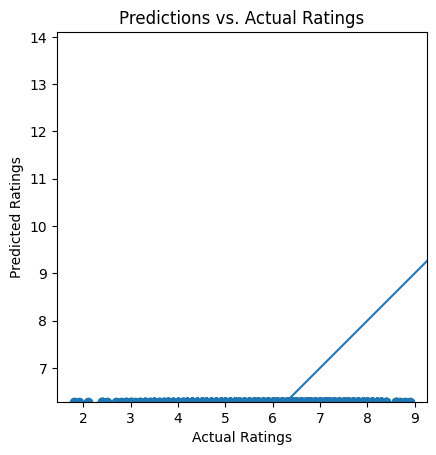

In [97]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.title('Predictions vs. Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.show()


# Exercise 6.3

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [22]:
from tensorflow.keras.layers import LSTM

# Reutilizaremos el tamaño de entrada y de embedding del modelo anterior
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=max_length))
model_lstm.add(LSTM(64))  # Puedes ajustar el número de unidades LSTM
model_lstm.add(Dense(1, activation='linear'))  # Usamos 'linear' para una tarea de regresión

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 850, 100)          3856000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3898305 (14.87 MB)
Trainable params: 3898305 (14.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
158/158 [==============================] - 24s 120ms/step - loss: 4.2758 - mae: 1.3488 - val_loss: 1.0949 - val_mae: 0.8339
Epoch 2/10
158/158 [==============================] - 16s 104ms/step - loss: 1.1965 - mae: 0.8531 - val_loss: 1.1075 - val_mae: 0.8164
Epoch 3/10
158/158 [==============================] - 13s 80ms/step - loss: 1.1903 - mae: 0.8476 - val_loss: 1.1026 - val_mae: 0.8395
Epoch 4/10
158/158 [==============================] - 10s 60ms/step - loss: 1.1921 - mae: 0.8490 - val_loss: 1.1006 - val_mae: 0.8382
Epoch 5/10
158/158 [==============================] - 7s 45ms/step - loss: 1.1996 - mae: 0.8538 - val_loss: 1.0882 - val_mae: 0.8259
Epoch 6/10
158/158 [==============================] - 9s 57ms/step - loss: 1.1914 - mae: 0.8495 - val_loss: 1.0973 - val_mae: 0.8359
Epoch 7/10
158/158 [==============================] - 8s 52ms/step - loss: 1.1953 - mae: 0.8538 - val_loss: 1.1243 - val_mae: 0.8539
Epoch 8/10
158/158 [==============================] - 7s 42ms/s

In [24]:
test_loss_lstm, test_mae_lstm = model_lstm.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss with LSTM: {test_loss_lstm}\nTest MAE with LSTM: {test_mae_lstm}')


50/50 [==============================] - 1s 11ms/step - loss: 1.1683 - mae: 0.8340
Test Loss with LSTM: 1.1682984828948975
Test MAE with LSTM: 0.8340036869049072


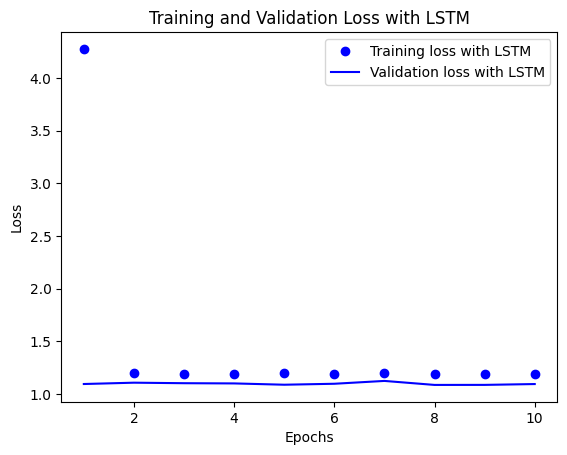

In [25]:
loss_lstm = history_lstm.history['loss']
val_loss_lstm = history_lstm.history['val_loss']

epochs_lstm = range(1, len(loss_lstm) + 1)

plt.plot(epochs_lstm, loss_lstm, 'bo', label='Training loss with LSTM')
plt.plot(epochs_lstm, val_loss_lstm, 'b', label='Validation loss with LSTM')
plt.title('Training and Validation Loss with LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


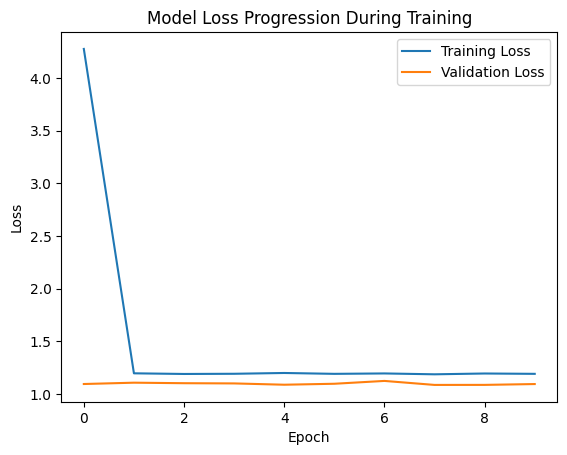

In [91]:
import matplotlib.pyplot as plt

plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


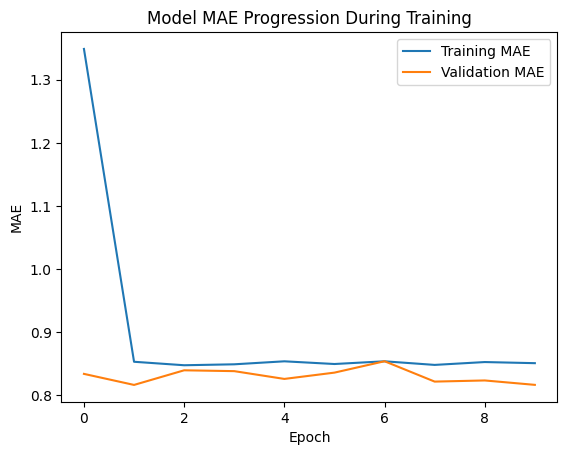

In [92]:
plt.plot(history_lstm.history['mae'], label='Training MAE')
plt.plot(history_lstm.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Progression During Training')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training MAE', 'Validation MAE'])
plt.show()


50/50 [==============================] - 1s 13ms/step


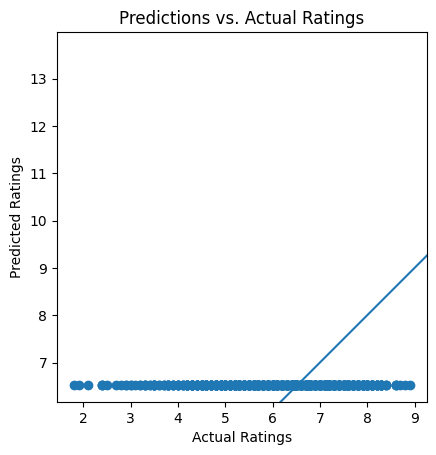

In [94]:
predictions = model_lstm.predict(X_test)
plt.scatter(y_test, predictions)
plt.title('Predictions vs. Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.show()


# Exercise 6.4

Create a GRU neural network to predict the rating of a movie

Calculate the testing set accuracy

In [88]:
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.optimizers import Adam

# Ajustes
learning_rate = 0.001  # Tasa de aprendizaje ajustada
dropout_rate = 0.5     # Tasa de dropout

# Construir el modelo con capas GRU adicionales y Dropout
model_gru_modified = Sequential()
model_gru_modified.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
model_gru_modified.add(GRU(128, return_sequences=True))  # return_sequences=True para permitir apilamiento de capas GRU
model_gru_modified.add(Dropout(dropout_rate))
model_gru_modified.add(GRU(64))  # Segunda capa GRU
model_gru_modified.add(Dropout(dropout_rate))
model_gru_modified.add(Dense(1, activation='linear'))

# Compilar el modelo con una tasa de aprendizaje ajustada
optimizer = Adam(learning_rate=learning_rate)
model_gru_modified.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
model_gru_modified.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 850, 100)          3856000   
                                                                 
 gru_22 (GRU)                (None, 850, 128)          88320     
                                                                 
 dropout_16 (Dropout)        (None, 850, 128)          0         
                                                                 
 gru_23 (GRU)                (None, 64)                37248     
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 3981633 (15.19 MB)
Trainable params: 39

In [89]:
batch_size = 64  # Tamaño del batch ajustado

# Entrenar el modelo con el nuevo tamaño del batch y más épocas
history_gru_modified = model_gru_modified.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2, verbose=1)


Epoch 1/10
79/79 [==============================] - 41s 484ms/step - loss: 7.0933 - mae: 1.9706 - val_loss: 1.1065 - val_mae: 0.8402
Epoch 2/10
79/79 [==============================] - 11s 143ms/step - loss: 2.3381 - mae: 1.2180 - val_loss: 1.0981 - val_mae: 0.8311
Epoch 3/10
79/79 [==============================] - 10s 134ms/step - loss: 2.0185 - mae: 1.1263 - val_loss: 1.1962 - val_mae: 0.8896
Epoch 4/10
79/79 [==============================] - 10s 120ms/step - loss: 1.9534 - mae: 1.1116 - val_loss: 1.1196 - val_mae: 0.8184
Epoch 5/10
79/79 [==============================] - 8s 106ms/step - loss: 1.8408 - mae: 1.0755 - val_loss: 1.1030 - val_mae: 0.8377
Epoch 6/10
79/79 [==============================] - 9s 109ms/step - loss: 1.8845 - mae: 1.0909 - val_loss: 1.1557 - val_mae: 0.8695
Epoch 7/10
79/79 [==============================] - 8s 101ms/step - loss: 1.8460 - mae: 1.0703 - val_loss: 1.1362 - val_mae: 0.8594
Epoch 8/10
79/79 [==============================] - 7s 92ms/step - loss:

In [90]:
test_loss_gru, test_mae_gru = model_gru_modified.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss with GRU: {test_loss_gru}\nTest MAE with GRU: {test_mae_gru}')

50/50 [==============================] - 1s 23ms/step - loss: 1.0952 - mae: 0.8240
Test Loss with GRU: 1.0952351093292236
Test MAE with GRU: 0.8239961266517639


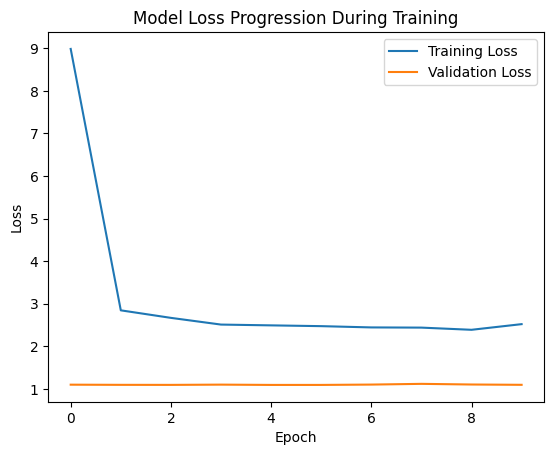

In [57]:
import matplotlib.pyplot as plt

plt.plot(history_gru_modified.history['loss'], label='Training Loss')
plt.plot(history_gru_modified.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


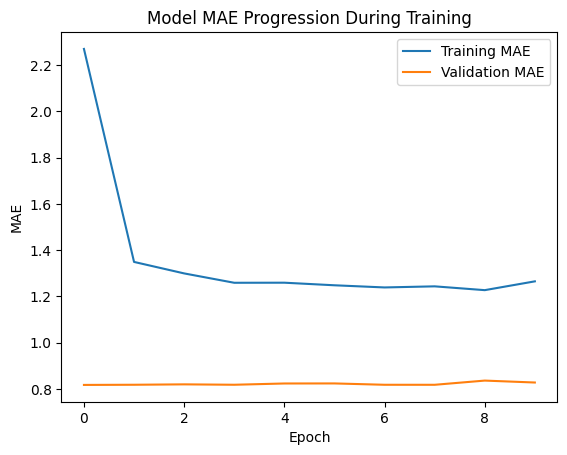

In [58]:
plt.plot(history_gru_modified.history['mae'], label='Training MAE')
plt.plot(history_gru_modified.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Progression During Training')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training MAE', 'Validation MAE'])
plt.show()


50/50 [==============================] - 2s 22ms/step


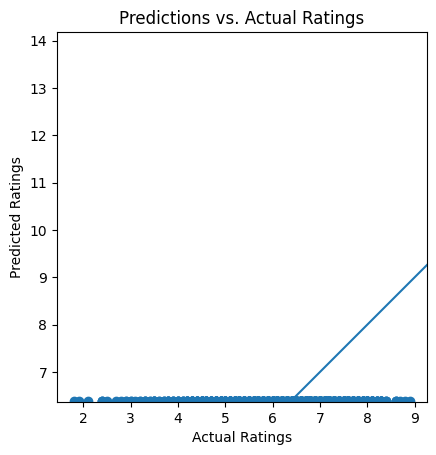

In [59]:
predictions = model_gru_modified.predict(X_test)
plt.scatter(y_test, predictions)
plt.title('Predictions vs. Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.show()


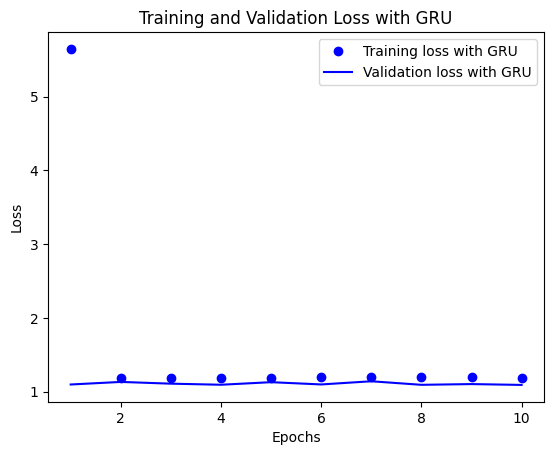

In [29]:
loss_gru = history_gru.history['loss']
val_loss_gru = history_gru.history['val_loss']

epochs_gru = range(1, len(loss_gru) + 1)

plt.plot(epochs_gru, loss_gru, 'bo', label='Training loss with GRU')
plt.plot(epochs_gru, val_loss_gru, 'b', label='Validation loss with GRU')
plt.title('Training and Validation Loss with GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
